# Importing the Dependencies

In [221]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


import joblib

# Data Collection

In [133]:
df = pd.read_csv('insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# EDA

In [134]:
print('data has ',df.shape[0],'rows and ',df.shape[1],'columns')

data has  1338 rows and  7 columns


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:<br>

Sex<br>
Smoker<br>
Region

In [136]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

data has no null values 

In [137]:
df.groupby('charges').mean()

,age,bmi,children
charges,,,
1121.87390,18.0,23.210,0.0
1131.50660,18.0,30.140,0.0
1135.94070,18.0,33.330,0.0
1136.39940,18.0,33.660,0.0
1137.01100,18.0,34.100,0.0
...,...,...,...
55135.40209,33.0,35.530,0.0
58571.07448,31.0,38.095,1.0
60021.39897,52.0,34.485,3.0


# DataAnalysis and  visualization

In [138]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [139]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [140]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [141]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<IPython.core.display.Javascript object>


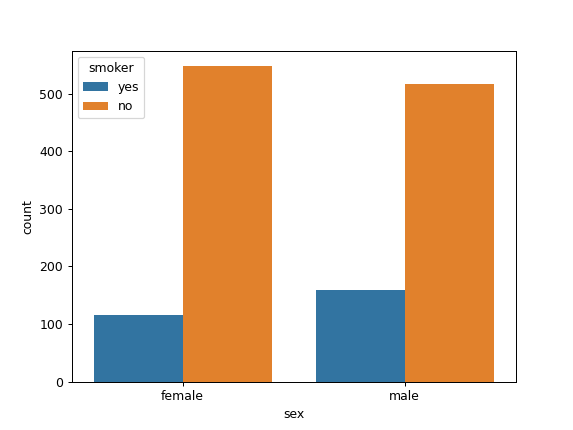

In [144]:
%matplotlib notebook
sns.countplot(x='sex',hue='smoker',data=df)
plt.show()

<IPython.core.display.Javascript object>


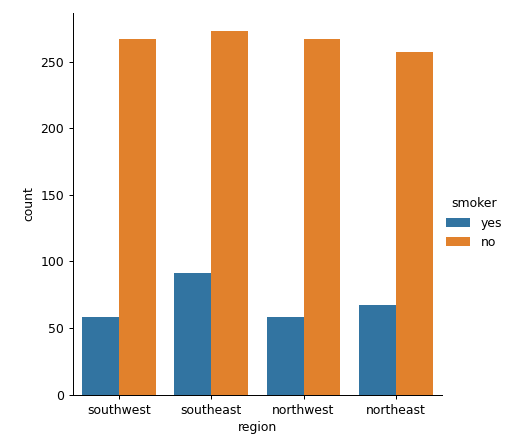

In [166]:
%matplotlib notebook
sns.catplot(x='region',hue='smoker',data=df,kind='count')
plt.show()

<IPython.core.display.Javascript object>


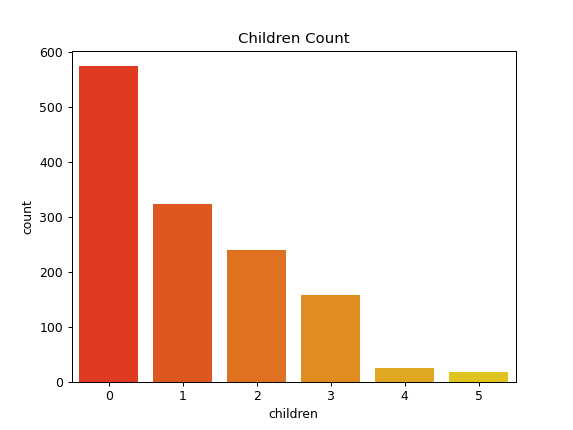

<AxesSubplot:title={'center':'Children Count'}, xlabel='children', ylabel='count'>

In [225]:
plt.title("Children Count")
sns.countplot(x='children', data=df, palette='autumn')

In [145]:
df.groupby('smoker').sum()

,age,bmi,children,charges
smoker,,,,
no,41906,32613.510,1160,8.974061e+06
yes,10553,8414.115,305,8.781764e+06


<IPython.core.display.Javascript object>


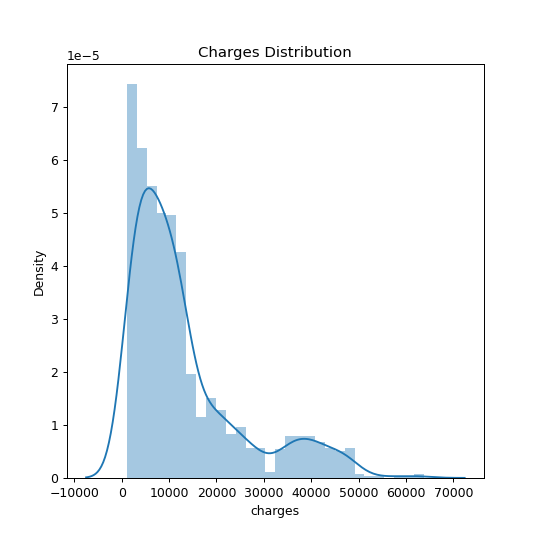

C:\Users\VT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [167]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

skwed to the right

<IPython.core.display.Javascript object>


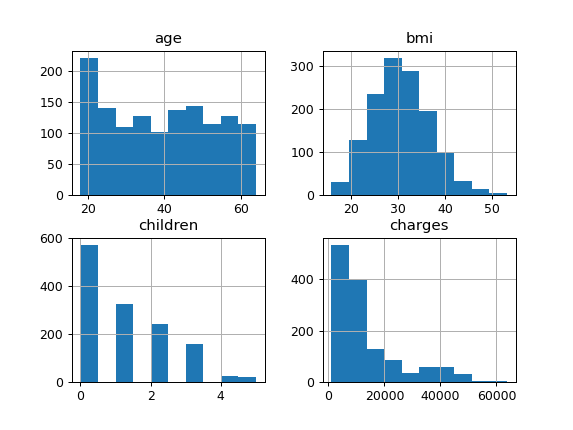

In [146]:
df.hist()
plt.show()

In [148]:
np.mean(df.bmi)

30.663396860986538

In [149]:
np.mean(df.age)

39.20702541106129

<IPython.core.display.Javascript object>


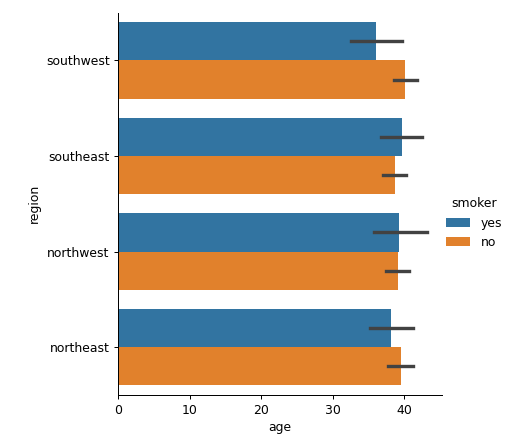

In [150]:
s=sns.catplot(x='age',y='region',hue='smoker',kind='bar',data=df)
plt.show()

<IPython.core.display.Javascript object>


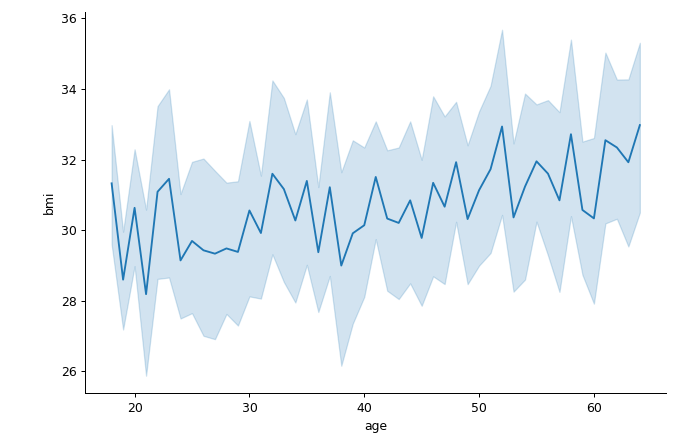

In [170]:
#discover the corrlation between age and bmi
sns.relplot(x='age',y='bmi',kind='line',data=df)
plt.show()

In [175]:
#discover the corrlation between age and bmi
df['age'].corr(df['bmi'])*100

10.927188154853518

In [177]:
df['age'].corr(df['charges'])*100

29.900819333064753

it's only 10% very weak

In [174]:
df['children'].corr(df['charges']) *100

6.799822684790486

In [178]:
df['children'].corr(df['bmi']) *100

1.2758900820673849

<h4>Finding outliers</h4>

In [153]:
iqr = iqr(df['age'])
lower_threshold = np.quantile(df['age'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(df['age'], 0.75) + 1.5 * iqr

In [154]:
print('the lower_threshold is : ',lower_threshold,'the upper_threshold is',upper_threshold)

the lower_threshold is :  -9.0 the upper_threshold is 87.0


<IPython.core.display.Javascript object>


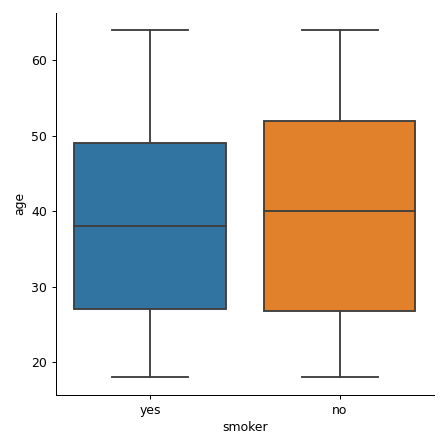

In [155]:
g = sns.catplot(x="smoker",
y="age",
data=df,
kind="box")
plt.show()

<IPython.core.display.Javascript object>


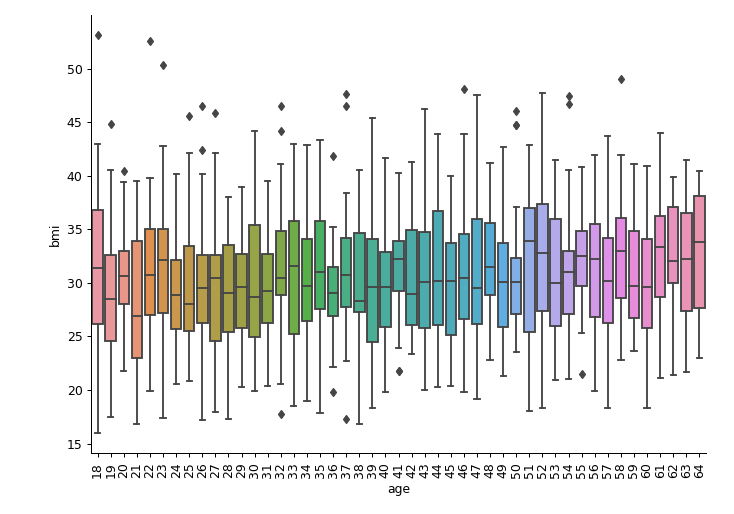

In [161]:

p= sns.catplot(x='age',y='bmi',data=df,kind='box')
plt.xticks(rotation=90)
plt.show()

In [162]:
df[(df['age'] < lower_threshold) | (df['age'] > upper_threshold)] 

,age,sex,bmi,children,smoker,region,charges


In [163]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Pre-Processing

Encoding the categorical features

In [168]:
df.replace({'male':0 ,'female':1},inplace=True)

In [169]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
413,25,0,23.9,5,no,southwest,5080.096


In [180]:
df.replace({'no':0,'yes':1},inplace=True)

In [182]:
lb=LabelEncoder()

In [184]:
df['region']=lb.fit_transform(df['region'])

In [186]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
1166,57,0,40.37,0,0,2,10982.5013


In [187]:
#take a copy of the data 
data_pre = df.copy()

In [188]:
#saving the data 
data_pre.to_csv('insurance_pre')

<h2>split the data </h2>

In [195]:
x=df.drop(columns='charges')

In [196]:
y=df.charges

In [197]:
x.shape

(1338, 6)

In [198]:
y.shape

(1338,)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [201]:
print(f"Number of Training dataset: {len(X_train)}\nNumber of Testing dataset: {len(X_test)}")

Number of Training dataset: 1003
Number of Testing dataset: 335


# Modeling

In [212]:
def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

# Random Forest Regressor

In [213]:
rf_model = RandomForestRegressor()
train(rf_model, "Random Forest")
r2(rf_model, "Random Forest")

Random Forest model score on Training data: 97.42193746398985%
Random Forest model score on Testing data: 86.7696757400996%
R2 Score for Random Forest is 86.7696757400996%


# Gradient Boosting

In [214]:
gbr = GradientBoostingRegressor()
train(gbr, "Gradient Boosting")
r2(gbr, "Gradient Boosting")

Gradient Boosting model score on Training data: 89.88350105159796%
Gradient Boosting model score on Testing data: 89.78396748947026%
R2 Score for Gradient Boosting is 89.78396748947026%


# SVR

In [215]:
svr = SVR(kernel='rbf', gamma='auto', C=50000)
train(svr, "SVR")
r2(svr, "SVR")

SVR model score on Training data: 96.54161101788404%
SVR model score on Testing data: 54.994687656247066%
R2 Score for SVR is 54.994687656247066%


# LinearRegression

In [217]:
l_model = LinearRegression()
train(l_model,'LinearRegression')
r2(l_model,'LinearRegression')

LinearRegression model score on Training data: 73.37162219022217%
LinearRegression model score on Testing data: 79.62732059725785%
R2 Score for LinearRegression is 79.62732059725785%


# Decision Tree

In [219]:
d_model=DecisionTreeRegressor()
train(d_model,'Decision Tree')
r2(d_model,'Decision Tree')

Decision Tree model score on Training data: 99.94547916438285%
Decision Tree model score on Testing data: 66.23046538859437%
R2 Score for Decision Tree is 66.23046538859437%


# save the model

We can notice that Gradient Boosting has the best accuracy without  overfitting

In [224]:
joblib.dump(gbr,'gbr model')

['gbr model']